### Functions and script to interface with recorded Harp Binaries

**Inputs:**
- Binary files in session folder saved in 'Behavior.harp', and 'SoundCard.harp' subdirectories.<br>

**Key outputs**
- **poke_events**: A Data Frame with all nose poke events recorded in ports 0 and 1, where the index (Time) gives the timestamp of poke events in port 0 (DIPort0) and 1 (DIport1). An event occurs every time DIPort0 or DIPort1 switch to true or false, (indicating a nose poke in or out respectively).
- **photodiode_data**: A Series in which the index (Time) gives timestamps of an analogue signal (AnalogueInput0) sampled from a photodiode
- **audio_events**: A data frame with all audio events which occur whenever a message is sent to the sound card to play an audio file, with the columns:  
    - "**Time**", specifying the timestamp (in seconds) of the onset of each audio event. 
    - "**PlaySoundOrFrequency**",  specifying the index on which the audio file was set, where 14 indicates the audio cue for port 0, 10 indicates the audio cue for port 1 and 18 indicates an audio file for silence.  

Note that there are no event "onsets" and "offsets" as with the poke events, but rather a continuous stream of events, with audio onsets indicated by the onset of silence!

In [1]:
# Import main libraries and define data folder
import harp
import os
import matplotlib.pyplot as plt
import utils.harp_utils as hu

#==============================================================================

# Choose example session to analyze
animal_ID = 'FNT099'
session_ID = '2024-05-13T11-03-59'

# path raw data on Ceph
raw_data_dir = "W:\\projects\\FlexiVexi\\raw_data" 
#==============================================================================

# Create reader for behavior.
bin_b_path = os.path.join(raw_data_dir, animal_ID, session_ID, "Behavior.harp")
behavior_reader = harp.create_reader(bin_b_path)

# Specify mapping from sound index to reward port (This shouldn't change unless 
# you reprogramme the soundcard!)
soundIdx0 = 14
soundIdx1 = 10
soundOffIdx = 18

# Output folder to save intermediate variables (Use session folder in raw data directory)
session_output_folder = os.path.join(raw_data_dir, animal_ID, session_ID, "harp_data")

**Get all poke events**

In [2]:
# Read the behavior harp stream, Digital Input states for the nosepoke timestamps and IDs. Drop DI3 <-- What's DI3??
poke_events = hu.get_all_pokes(behavior_reader)

**Stream photodiode data**

The photodiode signal clearly separates periods where nothing is happening from periods where either the dot is being projected, or the fail state is on (in which the arena lights turn on). However, the dot projection and fail states are not clearly distinguishable with a single threshold, since both states result in saturation of the photodiode. 

Workarounds for this will be explored in the ephys-postprocessing pipeline.

Text(0.5, 1.0, 'Plot Raw Photodiode Signal')

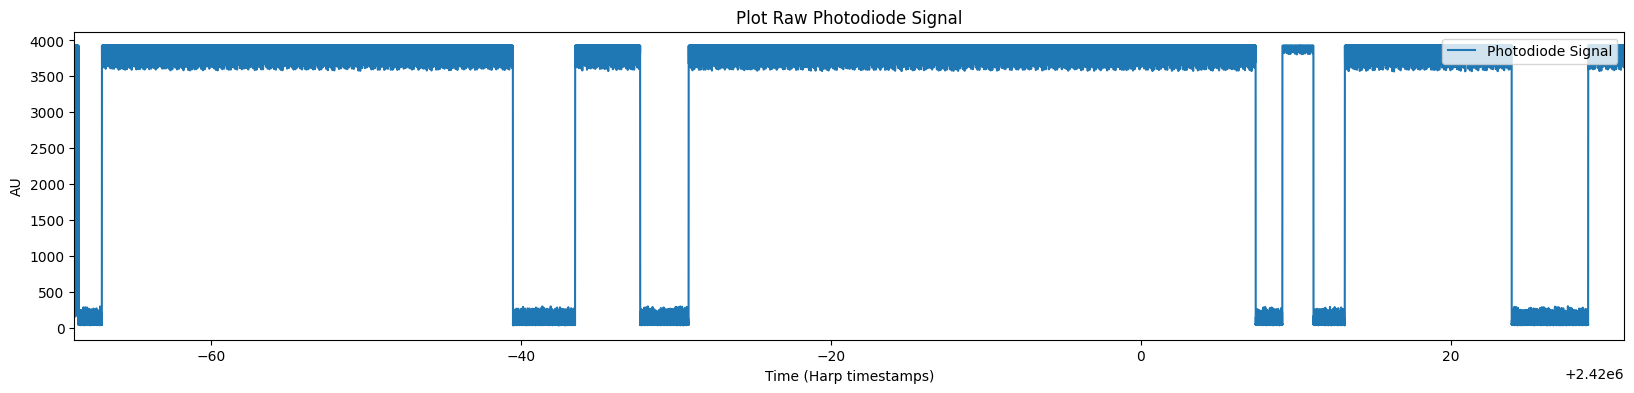

In [3]:
photodiode_data = hu.parse_photodiode_data(behavior_reader)

# Plot first 100 seconds of raw photodiode data
plt.figure(figsize=(20, 4))
plt.xlim(photodiode_data.index[0], photodiode_data.index[0] + 100)
plt.plot(photodiode_data, label = 'Photodiode Signal')
plt.xlabel('Time (Harp timestamps)')
plt.ylabel('AU')
plt.legend(loc = 'upper right')
plt.title('Plot Raw Photodiode Signal')

**Get all audio events**

In [4]:
# Load the sound card binary data (register 32) and show resulting dataframe
bin_sound_path = os.path.join(raw_data_dir, animal_ID, session_ID, "SoundCard.harp","SoundCard_32.bin")

# Read the harp sound card stream, for the timestamps and audio ID
all_sounds = hu.get_all_sounds(bin_sound_path)

# Show dataframe
all_sounds.head()

,Time,PlaySoundOrFrequency
0,2.419953e+06,14
1,2.419961e+06,18
2,2.419963e+06,10
3,2.419969e+06,18
4,2.419983e+06,14
